# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pylab as pl
import itertools

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
from google.colab import files
files.upload()

Saving car_data.csv to car_data.csv


{'car_data.csv': b'Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather\r\n17314.1031289016,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1\r\n17542.0360832793,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n16218.8478619377,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n16336.9131400486,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0\r\n16339.1703239255,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1\r\n15709.0528210833,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n15230.0033898479,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n15048.042184116,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n14862.0938695978,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1\r\n15295.0182668788,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1\r\n21335.852484891,10237,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,0,0\r\n20538.0875102254,15066,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,1,0\r\n20512.0940912389,16633,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,1,0

In [ ]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [ ]:
LR_car=LinearRegression()
x=df[['Mileage']]
y=df['Price']
LR_car.fit(x,y)

LinearRegression()

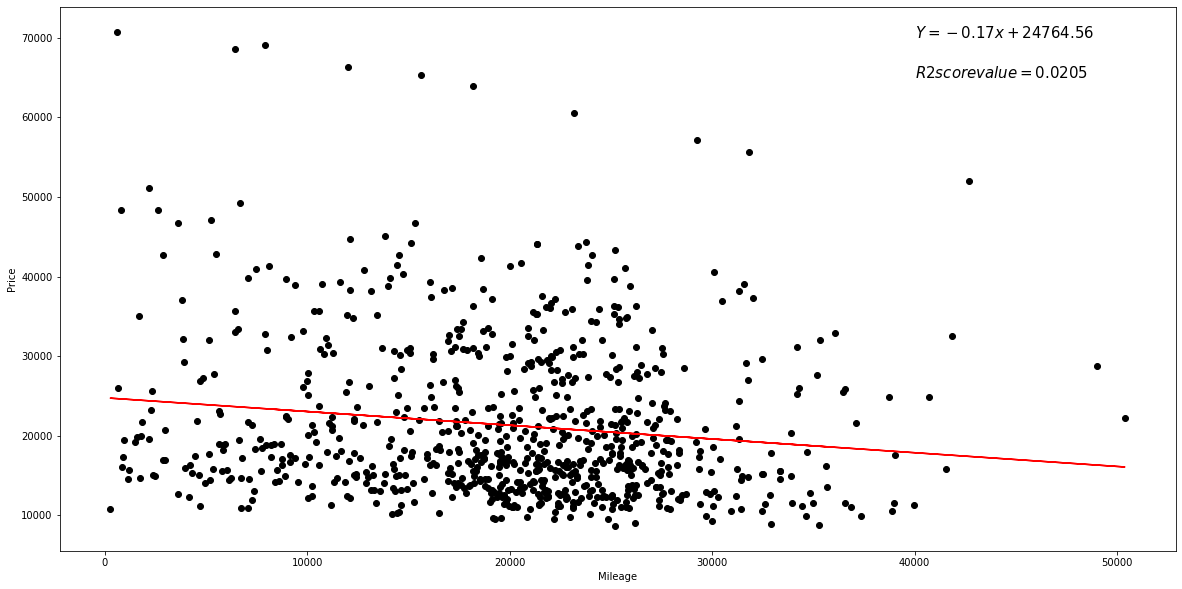

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.scatter(x,y,color='black')
plt.plot(x,LR_car.predict(x),color='red')
plt.text(40000,70000,"$Y= %.2fx + %.2f$"%(LR_car.coef_[0],LR_car.intercept_),fontsize=15)
plt.text(40000,65000,"$R2  score value =  %.4f$"%(LR_car.score(x,y)),fontsize=15)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

The R Score of .020 is not a great one.  Need to look at other options 

Tasks, Part 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the combination of the factors that is the best predictor for price.

In [ ]:
#print(df.columns)
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X = df[features]
y = df[price]

regr = LinearRegression()
regrtask2 = regr.fit(X, y)

In [ ]:
print('R-squared based on Mileage, cylinder,liter etc:      ', regrtask2.score(X,y))

R-squared based on Mileage, cylinder,liter etc:       0.4462643536728379


0.44 is also not a strong correlation

Tasks, Hard Mode

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Find the best combination of factors to predict price.

In [ ]:
df_dummies= pd.get_dummies(df,columns=['Make','Model','Type'])
#df_dummies

In [ ]:
#df_dummies.columns

In [ ]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_dummies[columns]
y = df_dummies['Price']

regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477


In [ ]:
#Finding the best combination of features
combos=[]
for i in range(1,11):
  combos.append(itertools.combinations(features,i))



In [ ]:
check_score=0
for combins in combos:
  for z in combins:
    z=list(z)
    x=df[z]
    deg=8
    for degree in range(deg):
      model=pipeline.Pipeline([
                               ('poly',preprocessing.PolynomialFeatures(degree=deg)),
                               ('linear',linear_model.LinearRegression(fit_intercept=False))
                               ])
      model = model.fit(x,y)
      model_score = model.score(x, y)
      if check_score < model.score(x, y):
        check_score = model.score(x, y)
        maxgroup = z
        best_degree = degree
            
print(degree, maxgroup, check_score)


7 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.9097847608823275
